<a href="https://colab.research.google.com/github/Pillangocska/Machine_Learning_VIMIMA05/blob/main/ML_lab2_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear models for regression and classification

In the first part of the session, you will generate datasets and fit linear regression models using the `numpy` and `sklearn` packages. The theoretical background can be found in the lecture notes; we suggest to follow it closely.


## Data generation

First, we demonstrate linear regression on a toy dataset we generate ourselves, with a linear relationship between inputs and outputs with some additional noise.

**Exercise 1.** Generate a linear dataset with additive Gaussian noise.

In more detail:

- Use the [`np.linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) function to generate $51$ evenly spaced training inputs from $0$ to $10$ (`x_train`). The result should look something like
```
array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
          2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
          4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,
          6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,
          8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. ])
```
- Generate the corresponding labels by computing $w \cdot x + b$ with $w = 0.7$ and $b = 2$, i.e.
```
array([2.  , 2.14, 2.28, 2.42, 2.56, 2.7 , 2.84, 2.98, 3.12, 3.26, 3.4 ,
         3.54, 3.68, 3.82, 3.96, 4.1 , 4.24, 4.38, 4.52, 4.66, 4.8 , 4.94,
         5.08, 5.22, 5.36, 5.5 , 5.64, 5.78, 5.92, 6.06, 6.2 , 6.34, 6.48,
         6.62, 6.76, 6.9 , 7.04, 7.18, 7.32, 7.46, 7.6 , 7.74, 7.88, 8.02,
         8.16, 8.3 , 8.44, 8.58, 8.72, 8.86, 9.  ])
```
Keep in mind that contrary to Python lists, you can perform arithmetic operations and [functions](https://numpy.org/doc/stable/reference/routines.math.html) on `numpy` arrays just as you would on scalars, *i.e.* operations will automatically be applied to all elements of the array.
- Add some random noise to the labels with the [`np.random.randn`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html) function (`y_train`).
- Use the [`np.linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) function to generate $100$ evenly spaced test inputs from $0$ to $10$ (`x_test`).
- Plot the training dataset with the [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) function.

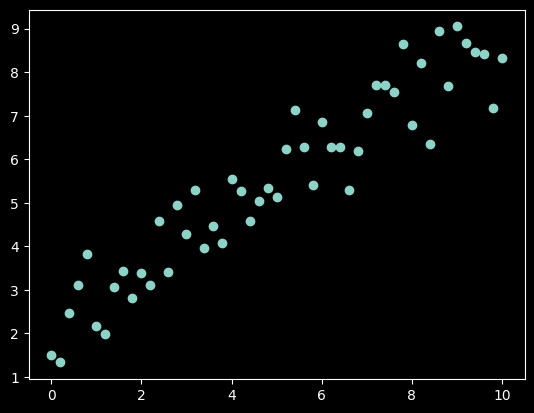

In [1]:
from matplotlib import pyplot as plt
import numpy as np

N       = 51
x_train = np.linspace(0,10,51)
y_train = 0.7*x_train + 2 + np.random.randn(N)*0.8
x_test  = np.linspace(0,10,101)

plt.style.use('dark_background')
plt.scatter(x_train,y_train);

## Maximum likelihood estimation

Recall that solving a linear regression model amounts to computing the parameters
\begin{align*}
\mathbf{w} = (\mathbf\Phi^\top \mathbf\Phi)^{-1} \mathbf\Phi^\top \mathbf y,
\end{align*}
where $\mathbf\Phi$ is a matrix containing some transformed version of the inputs in its rows (for more details, see sec. 2.2 of the lecture notes).

**Exercise 2.** Implement the linear regression model using the formulae derived in the lecture notes and fit a line to the dataset you generated.

In more detail:
- Compute the matrix of transformed inputs $\mathbf\Phi$ by stacking a column of ones with the training samples (`Phi_train`). You can use the [`np.vstack`](https://numpy.org/doc/stable/reference/generated/numpy.vstack.html) and [`np.ones`](https://numpy.org/doc/stable/reference/generated/numpy.ones.html) functions. The result should look something like
```
array([[ 1. ,  0. ],
         [ 1. ,  0.2],
         [ 1. ,  0.4],
         [ 1. ,  0.6],
         [ 1. ,  0.8],
         [ 1. ,  1. ],
         [ 1. ,  1.2],
         ...
```
- Transform the test inputs in the same way (`Phi_test`).
- Implement the formula
\begin{align*}
\mathbf{w} = (\mathbf\Phi^\top \mathbf\Phi)^{-1} (\mathbf\Phi^\top \mathbf y).
\end{align*}
Note: it is very impractical to compute matrix inverses directly. Use the [`np.linalg.solve`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html) function instead. You can transpose matrices with `Phi_train.T` and perform matrix multiplication with the `@` operator or [`np.matmul`](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html).
- Compute the predictions for the test inputs using the formula
\begin{align*}
\mathbf y_{\text{test}} = \mathbf\Phi_{\text{test}}\mathbf w
\end{align*}
- Plot the results using [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) for the training dataset and [`plt.plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) for the test inputs and predictions.

>**_NOTE:_** Since the matrix $\mathbf\Phi^\top\mathbf\Phi$ is symmetric and positive definite, an even more efficient implementation would use a Cholesky decomposition and solution (*e.g.* [`scipy.linalg.cho_factor`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.cho_factor.html#scipy.linalg.cho_factor) and [`scipy.linalg.cho_solve`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.cho_solve.html)). Give it a try if you want.

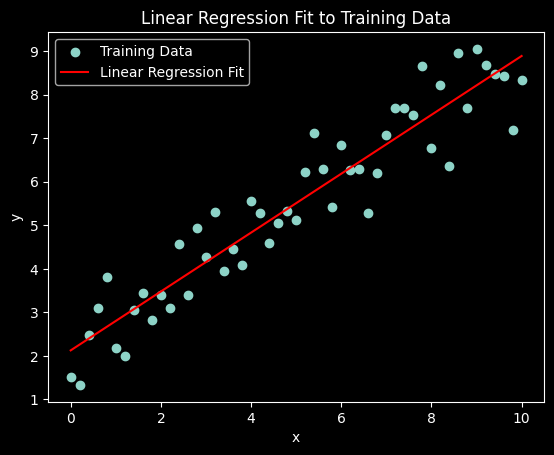

In [7]:
# Compute Phi, Phi_test, w and y_test. Plot the results.

# Phi is Phi_train in this case:
Phi_train = np.vstack([np.ones(N), x_train]).T
# print("PHI_TRAIN:")
# print(Phi_train)

# We transform the test inputs the same way:
Phi_test = np.vstack([np.ones(len(x_test)), x_test]).T
# print("PHI_TEST:")
# print(Phi_test)

# Compute the w parameter:
w = np.linalg.solve(Phi_train.T @ Phi_train, Phi_train.T @ y_train)
# print(w)

# Predictions for the test inputs:
y_test = Phi_test @ w
# print(y_test)

# Plotting
plt.scatter(x_train, y_train, label='Training Data')
plt.plot(x_test, y_test, color='red', label='Linear Regression Fit')
plt.title('Linear Regression Fit to Training Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Nonlinear regression

In this exercise, we slightly modify the transformation to perform polynomial regression; everything else stays the same. First we generate a nonlinear dataset.

**Exercise 3.** Generate a nonlinear dataset.

In more detail:

- The inputs are the same as in the linear case.
- Generate the outputs as $(x-9)\cdot(x-6)\cdot(x-1)$ with some additional Gaussian noise (scale it up to have $\sigma \sim 5$ for it to be a bit more challenging).
- Plot the dataset.

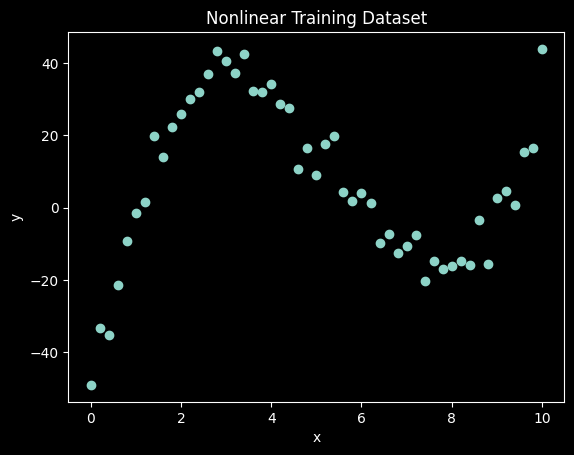

In [8]:
# Keep x_train and x_test; generate y_train and plot the dataset.

y_train_nonlinear = (x_train - 9) * (x_train - 6) * (x_train - 1) + np.random.randn(N) * 5

plt.scatter(x_train, y_train_nonlinear)
plt.title('Nonlinear Training Dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**Exercise 4.** Modify your algorithm to perform polynomial regression with cubic polynomials and demonstrate it on the nonlinear dataset. Recall that we only need to modify the transformation of the inputs, i.e. for an input $x_i$, we have
\begin{align*}
\phi: x_i \mapsto \left[1, x_i, x_i^2, x_i^3\right]^\top .
\end{align*}

In more detail:

- Generate the matrix $\mathbf\Phi$ containing the transformed training inputs in its rows. It should look something like
```
array([[1.   , 0.   , 0.   , 0.   ],
         [1.   , 0.2  , 0.04 , 0.008],
         [1.   , 0.4  , 0.16 , 0.064],
         [1.   , 0.6  , 0.36 , 0.216],
         [1.   , 0.8  , 0.64 , 0.512],
         [1.   , 1.   , 1.   , 1.   ],
         [1.   , 1.2  , 1.44 , 1.728],
         ...
```
Note: you can do this relatively painlessly with the [`np.power.outer`](https://numpy.org/doc/stable/reference/generated/numpy.ufunc.outer.html) or the [`np.vander`](https://numpy.org/doc/stable/reference/generated/numpy.vander.html) function.
- Do the same with the test inputs.
- Copy the code from the linear exercise and perform the nonlinear regression.
- Plot the results as in the previous case.

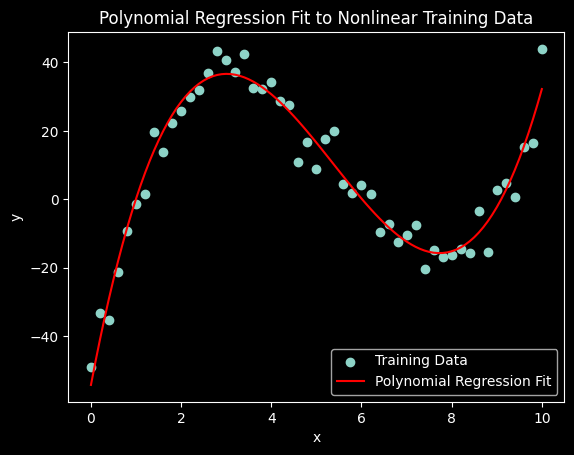

In [9]:
# Compute Phi, Phi_test, w and y_test. Plot the results.

Phi_train_nonlinear = np.vander(x_train, N=4, increasing=True)
Phi_test_nonlinear = np.vander(x_test, N=4, increasing=True)

w_nonlinear = np.linalg.solve(Phi_train_nonlinear.T @ Phi_train_nonlinear, Phi_train_nonlinear.T @ y_train_nonlinear)

y_test_nonlinear = Phi_test_nonlinear @ w_nonlinear

plt.scatter(x_train, y_train_nonlinear, label='Training Data')
plt.plot(x_test, y_test_nonlinear, color='red', label='Polynomial Regression Fit')
plt.title('Polynomial Regression Fit to Nonlinear Training Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Maximum a posteriori estimation

Recall that the maximum a posteriori estimation leads to the regularized version of (non)linear regression. The only modification is an additional term at the computation of $\mathbf w$, namely
\begin{align*}
\mathbf{w} = (\mathbf\Phi^\top \mathbf\Phi + \lambda \mathbf I)^{-1} \mathbf\Phi^\top \mathbf y.
\end{align*}

**Exercise 5.** Modify your algorithm to include regularization and do a couple of curve fittings with different $\lambda$ s.

In more detail:
- Include the additional term with using [`np.eye`](https://numpy.org/devdocs/reference/generated/numpy.eye.html) for the identity matrix.
- Plot the results using $\lambda = 0, 1, 10, 100$ and observe the effect of the regularization term.

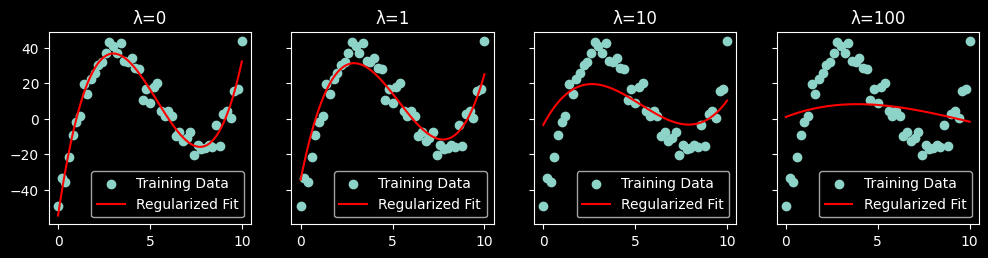

In [10]:
# set of regularization coefficients
lambdas = [0, 1, 10, 100]

f,ax = plt.subplots(1,4,sharey=True)
f.set_size_inches(12,2.5)

# we loop through all the different λ values
for i, lambda_val in enumerate(lambdas):
  # Compute Phi, Phi_test, w and y_test.
  w_reg = np.linalg.solve(Phi_train_nonlinear.T @ Phi_train_nonlinear + lambda_val * np.eye(4), Phi_train_nonlinear.T @ y_train_nonlinear)
  y_test_reg = Phi_test_nonlinear @ w_reg

  ax[i].scatter(x_train, y_train_nonlinear, label='Training Data')
  ax[i].plot(x_test, y_test_reg, color='red', label='Regularized Fit')
  ax[i].set_title(f'λ={lambda_val}')
  ax[i].legend()

plt.show()

How does the regularization coefficient $\lambda$ affect the fit? Write your answer below.

**Answer:**

***Regularization helps overfitting by penalizing large coefficients. This will result in simpler models, that may generalize better on unseen data, but potentially underfitting on the training data. In our case lambda=1 is more optimal.***

## Linear regression on a real-world dataset

**Exercise 6.** Demonstrate linear regression on `scikit-learn`'s `diabetes` dataset. In more detail:

- Load the dataset using `load_diabetes` from `sklearn.datasets`.
- Split the data into a training and a test set using [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from `sklearn.model_selection` (use a random $80\%$-$20\%$ split).
- Transform the samples and train a basic linear regression model manually by copying your code from the previous sections.
- Train a linear regression model using [`sklearn.linear_model.LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) (you will need the `fit()` and `predict()` methods).
- Evaluate and compare the predictive performance of the models using the root mean squared error metric. The two should give the same result.

In [12]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = load_diabetes()
X,y = data.data, data.target

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.metrics import mean_squared_error
# Perform linear regression manually

# Compute RMSE
# transform the samples for manual linear regression
# (add a column of ones for the intercept)
Phi_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
Phi_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

# linear regression manually
w_manual = np.linalg.solve(Phi_train.T @ Phi_train, Phi_train.T @ y_train)
y_pred_manual = Phi_test @ w_manual

# Compute RMSE for the manual model
rmse_manual = np.sqrt(mean_squared_error(y_test, y_pred_manual))

In [14]:
# Perform linear regression using scikit-learn

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_sklearn = lr.predict(X_test)

# Compute RMSE
rmse_sklearn = np.sqrt(mean_squared_error(y_test, y_pred_sklearn))

In [15]:
print("RMSE (manual): {:.4f}, RMSE (sklearn): {:.4f}".format(rmse_manual, rmse_sklearn))

RMSE (manual): 53.8534, RMSE (sklearn): 53.8534


# Logistic regression

In this part of the session, you will implement a logistic regression model, *i.e.* a linear model for binary classification.

## Data generation

Use the code below to generate some training and test data. The training data consists of two normally distributed blobs, whereas the test data lie on an evenly spaced $100\times 100$ covering the relevant part of the input space (for easy visualization).

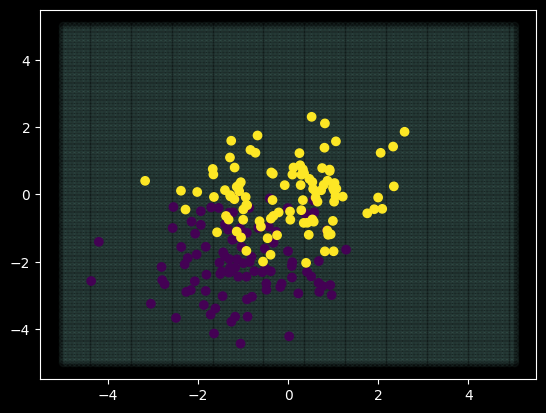

In [19]:
# Training data with two blobs
x_train = np.vstack((
    np.vstack((np.random.randn(100)-1,np.random.randn(100)-2)).T,
    np.vstack((np.random.randn(100),np.random.randn(100))).T
))
y_train = np.concatenate((np.zeros(100),np.ones(100)))

# Test data on a 100x100 grid
gr = np.linspace(-5,5,100)
gx,gy = np.meshgrid(gr,gr)
x_test = np.vstack([gx.flatten(),gy.flatten()]).T

plt.scatter(x_test[:,0],x_test[:,1],alpha=0.05)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train);

**Exercise 7.** Implement the gradient descent scheme for training a logistic regession model. Recall that it consists of the following steps:

1. Transform the inputs with $\phi: \mathbf x_i \mapsto \left[ 1 \quad \mathbf x_i\right]$. The result should look something like
```
array([[ 1.  ,  2.36, -3.54],
          [ 1.  , -0.96, -0.94],
          [ 1.  , -0.94, -1.35],
          [ 1.  , -0.37, -1.04],
          ...
```
If you want, you can experiment with other transformations to perform nonlinear classification.
2. Initialize the parameter vector $\mathbf w$ *e.g.* to zeros.
3. Compute the gradient
\begin{align*}
\nabla_{\mathbf w}L &=  -\sum_i (y_i - \sigma(\mathbf w^\top \phi(\mathbf x_i))) \phi_i,
\end{align*}
preferably in matrix form,
\begin{align*}
\nabla_{\mathbf w}L &=  -\mathbf \Phi^\top \left(\mathbf y - \sigma (\mathbf \Phi \mathbf w)\right) .
\end{align*}
4. Perform the update
\begin{align*}
\mathbf w \gets \mathbf w - \eta \cdot \nabla_{\mathbf w}L,
\end{align*}
where $\eta$ is the learning rate.
5. Repeat Steps 3-4 for a fixed number of steps.
6. Compute predictions as
\begin{align*}
\mathbf y_{\text{test}} = \sigma(\mathbf \Phi_{\text{test}} \mathbf w).
\end{align*}

Plot the results and observe if you managed to get a good fit. You can compare your algorithm to [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

In [20]:
# Numerically stable implementation of the sigmoid function
def sigmoid(a):
  u = np.exp(-np.abs(a))
  return np.where(a>0,1/(1+u),u/(1+u))

In [21]:
# Compute Phi and Phi_test
Phi = np.hstack((np.ones((x_train.shape[0], 1)), x_train))
Phi_test = np.hstack((np.ones((x_test.shape[0], 1)), x_test))

# Initialize the parameter vector w
w = np.zeros(Phi.shape[1])

# Perform gradient descent with a suitable learning rate
learning_rate = 0.1
n_iterations = 1000

for _ in range(n_iterations):
    # compute the gradient
    gradients = -Phi.T @ (y_train - sigmoid(Phi @ w))
    # update the parameter vector
    w -= learning_rate * gradients

# Compute predictions
y_pred = sigmoid(Phi_test @ w)

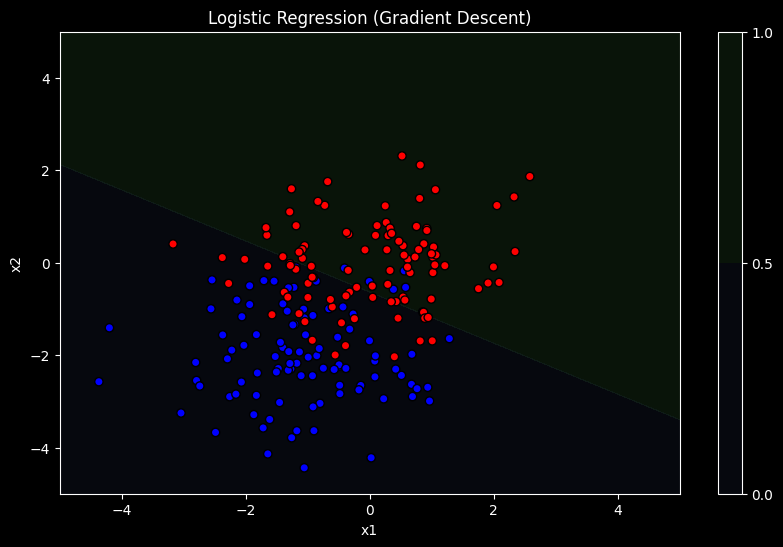

In [22]:
plt.figure(figsize=(10, 6))
plt.contourf(gx, gy, y_pred.reshape(100, 100), alpha=0.1, levels=np.linspace(0, 1, 3))
plt.colorbar()
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='bwr', edgecolors='k')
plt.title('Logistic Regression (Gradient Descent)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [24]:
# For comparison
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y)
pred = model.predict(x_test)

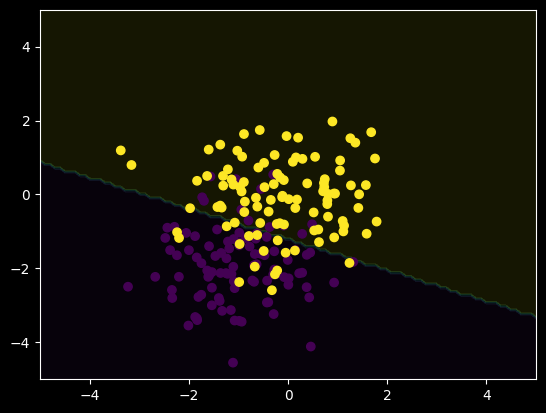

In [25]:
# Plot your own results
plt.contourf(gx,gy,pred.reshape(100,100),alpha=0.1)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.scatter(x[:,0],x[:,1],c=y);

**Optional exercise.** Derive the formula for the gradient of the regularized loss function (see *e.g.* the lecture notes). Train a regularized nonlinear logistic regression model on the previous data and try to underfit/overfit it.




<ipython-input-27-a2508c23d54c>:14: RuntimeWarning: overflow encountered in multiply
  gradients_reg = -Phi_nonlinear.T @ (y_train - sigmoid(Phi_nonlinear @ w_reg)) + lambda_val * w_reg
<ipython-input-27-a2508c23d54c>:14: RuntimeWarning: overflow encountered in matmul
  gradients_reg = -Phi_nonlinear.T @ (y_train - sigmoid(Phi_nonlinear @ w_reg)) + lambda_val * w_reg
<ipython-input-27-a2508c23d54c>:14: RuntimeWarning: invalid value encountered in matmul
  gradients_reg = -Phi_nonlinear.T @ (y_train - sigmoid(Phi_nonlinear @ w_reg)) + lambda_val * w_reg


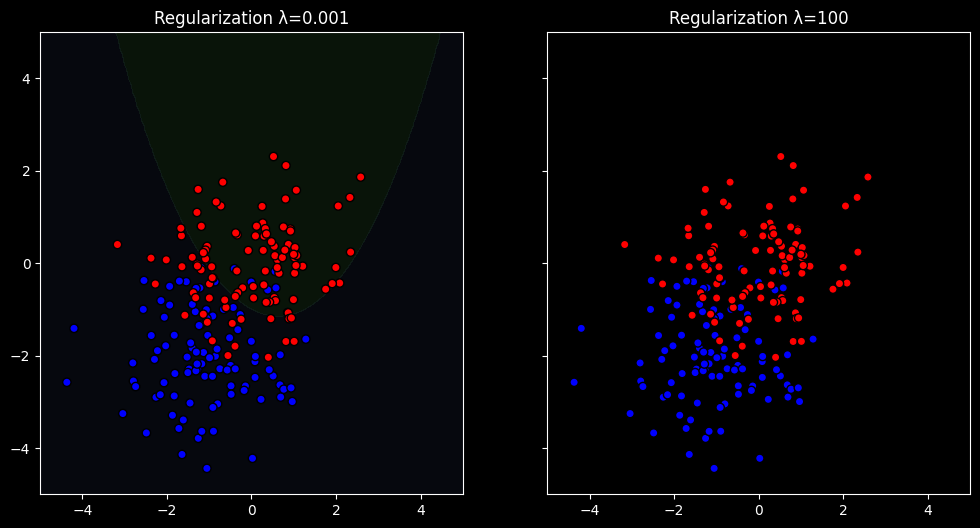

In [27]:
Phi_nonlinear = np.hstack((Phi, Phi[:, 1:]**2))
Phi_test_nonlinear = np.hstack((Phi_test, Phi_test[:, 1:]**2))
lambdas = [0.001, 100]

f, ax = plt.subplots(1, 2, sharey=True)
f.set_size_inches(12, 6)

for i, lambda_val in enumerate(lambdas):
    w_reg = np.zeros(Phi_nonlinear.shape[1])

    # gradient descent with regularization
    for _ in range(n_iterations):
        # gradient with regularization term
        gradients_reg = -Phi_nonlinear.T @ (y_train - sigmoid(Phi_nonlinear @ w_reg)) + lambda_val * w_reg
        # update parameter vector
        w_reg -= learning_rate * gradients_reg

    y_pred_reg = sigmoid(Phi_test_nonlinear @ w_reg)

    ax[i].contourf(gx, gy, y_pred_reg.reshape(100, 100), alpha=0.1, levels=np.linspace(0, 1, 3))
    ax[i].scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='bwr', edgecolors='k')
    ax[i].set_title(f'Regularization λ={lambda_val}')
    ax[i].set_xlim(-5, 5)
    ax[i].set_ylim(-5, 5)

plt.show()